**Atividade**:

Procure realizar a identificação de regras de negócio com Apriori. Identifique regras que concluem uma variável categoria, utilize esta como label e execute uma Árvore de Decisão, compare as regras da árvore com do apriori.
Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).Procure realizar a identificação de regras de negócio com Apriori. Identifique regras que concluem uma variável categoria, utilize esta como label e execute uma Árvore de Decisão, compare as regras da árvore com do apriori.
Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto)

Dataset: https://www.kaggle.com/datasets/vikrishnan/iris-dataset

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Duas técnicas diferentes (téc. de aprendizado **supervisionado** e **não-supervisionado**). Árvore de decisão (para regras de classificação) e Apriori (para identificar relações de associação. aqui tudo é feature; não está associado a labels)

1. Preparar dados - coluna label/ variável categórica pra prever ou explicar. A variável categórica

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# importar os dados
iris = pd.read_csv('iris.csv')

# primeiras linhas dos dados
print(iris.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# separar features e label
X = iris.drop(columns=['class'])  # features
y = iris['class'] # label - classe da flor

# dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Acurácia da Árvore de Decisão: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



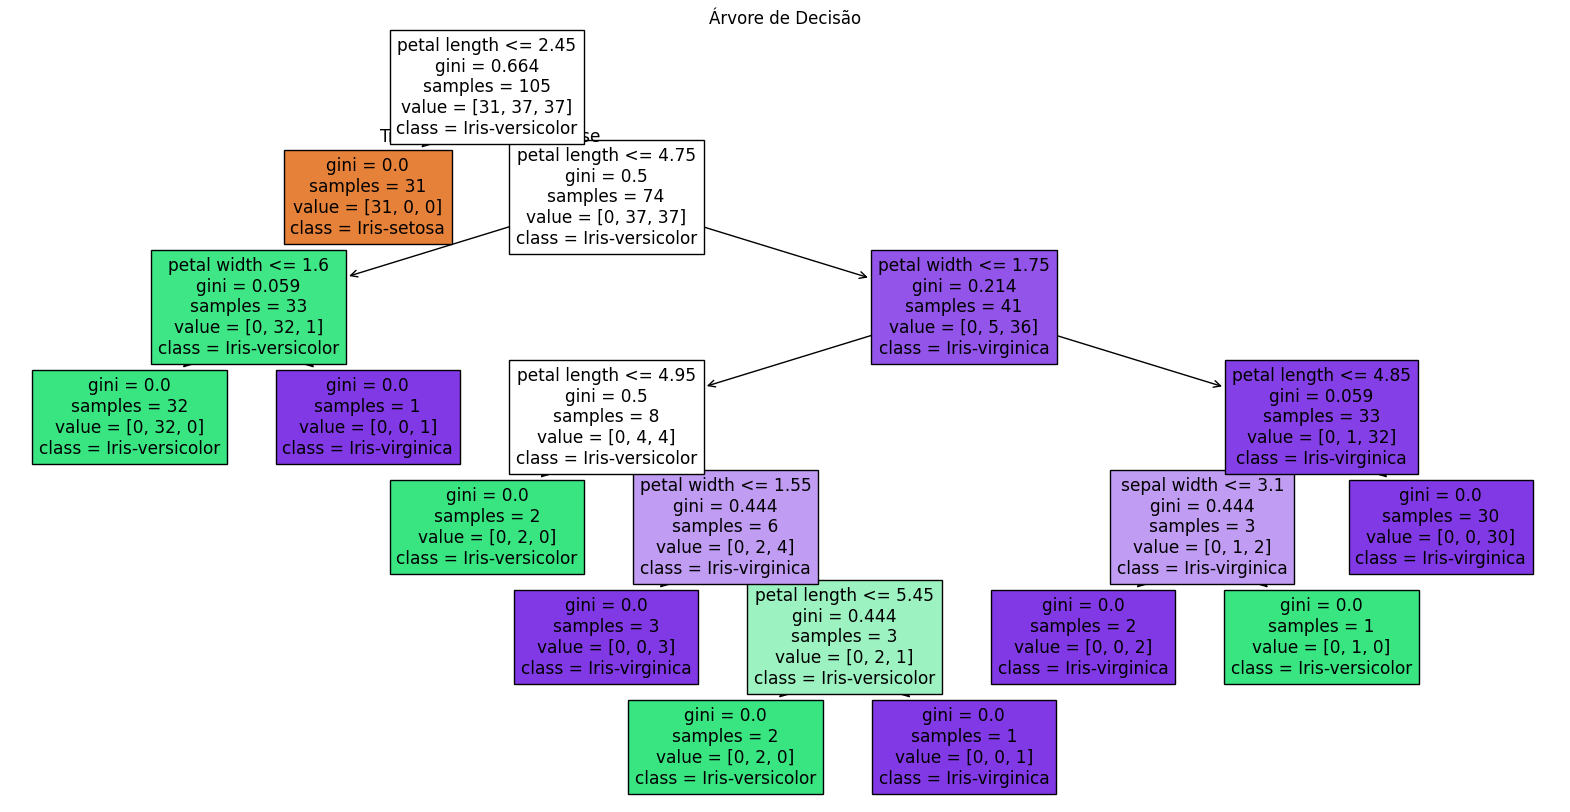

In [ ]:
## treinamento da Árvore de Decisão
tree  = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# predição - árvore de decisão
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia da Árvore de Decisão:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

#  árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title("Árvore de Decisão")
plt.show()

**Condição**:

Petal length <= 2.45

Gini: 0.664 (alta impureza no nó)

Amostras: 105

Valor: [31, 37, 37]

Classe: Iris-versicolor


**Primeira divisão:**
À esquerda: Se petal length <= 2.45 for vdd, então a amostra é da classe Iris-setosa com certeza (Gini = 0.0).

À direita: Se petal length > 2.45, a árvore continua dividindo.


**Divisões nas divisões:**
À direita do nó raiz, a próxima condição é petal length <= 4.75, com 74 amostras divididas entre Iris-versicolor e Iris-virginica.
A árvore continua dividindo com base em petal length e petal width em nós subsequentes, filtrando a classificação entre Iris-versicolor e Iris-virginica.

A árvore tem várias folhas com Gini = 0.0, indicando nós puros onde todas as amostras são de uma única classe. As decisões em cada nível têm valores numéricos das características das pétalas p/ separar as espécies de forma eficaz.

In [ ]:
## regras com apriori
# preparação dos dados p/ apriori
apriori_df = iris.copy()
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    apriori_df[col] = pd.cut(apriori_df[col], bins=3, labels=['low', 'medium', 'high'])

# transformar para one-hot encoding
apriori_encode = pd.get_dummies(apriori_df)

# algoritmo Apriori
frequent_itemsets = apriori(apriori_encode, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# refinando as regras da variável de interesse
label = 'class_Iris-setosa'
rules = rules[rules['consequents'].apply(lambda x: label in x)]
print("Regras Apriori que concluem a classe-alvo:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Regras Apriori que concluem a classe-alvo:
                                antecedents  \
7                        (sepal length_low)   
28                     (sepal width_medium)   
33                       (petal length_low)   
42                        (petal width_low)   
61   (sepal width_medium, sepal length_low)   
..                                      ...   
246    (petal length_low, sepal length_low)   
247                    (sepal width_medium)   
248                       (petal width_low)   
250                      (petal length_low)   
251                      (sepal length_low)   

                                           consequents   support  confidence  \
7                                  (class_Iris-setosa)  0.313333    0.796610   
28                                 (class_Iris-setosa)  0.240000    0.409091   
33                                 (class_Iris-setosa)  0.333333    1.000000   
42                                 (class_Iris-setosa)  0.333333    1.00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## comparando
# comparando as regras de associação apriori com as regras da árvore de decisão
print("\nComparação entre as Regras da Árvore de Decisão e do Apriori:")
for _, rule in rules.iterrows():
    print(f"Se {' e '.join(rule['antecedents'])}, então {rule['consequents']} com confiança de {rule['confidence']:.2f}")


Comparação entre as Regras da Árvore de Decisão e do Apriori:
Se sepal length_low, então frozenset({'class_Iris-setosa'}) com confiança de 0.80
Se sepal width_medium, então frozenset({'class_Iris-setosa'}) com confiança de 0.41
Se petal length_low, então frozenset({'class_Iris-setosa'}) com confiança de 1.00
Se petal width_low, então frozenset({'class_Iris-setosa'}) com confiança de 1.00
Se sepal width_medium e sepal length_low, então frozenset({'class_Iris-setosa'}) com confiança de 0.97
Se sepal width_medium, então frozenset({'class_Iris-setosa', 'sepal length_low'}) com confiança de 0.41
Se sepal length_low, então frozenset({'sepal width_medium', 'class_Iris-setosa'}) com confiança de 0.61
Se petal length_low e sepal length_low, então frozenset({'class_Iris-setosa'}) com confiança de 1.00
Se sepal length_low, então frozenset({'class_Iris-setosa', 'petal length_low'}) com confiança de 0.80
Se petal length_low, então frozenset({'class_Iris-setosa', 'sepal length_low'}) com confiança 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Regras da Árvore de Decisão**


1. Se sepal length é baixo, então Iris-setosa com confiança de 0.80

2. Se sepal width é médio, então Iris-setosa com confiança de 0.41

3. Se petal length é baixo, então Iris-setosa com confiança de 1.00

4. Se petal width é baixo, então Iris-setosa com confiança de 1.00

**Regras do Algoritmo Apriori**


1. Se sepal width é médio e sepal length é baixo, então Iris-setosa com confiança de 0.97

2. Se sepal width é médio e petal length é baixo, então Iris-setosa com confiança de 1.00

3. Se petal width é baixo e sepal length é baixo, então Iris-setosa com confiança de 1.00


### 1. Regras da Árvore de Decisão
- **Regra Exemplo**:
  - Se **sepal length** é baixa, então **class** é **Iris-setosa** (confiança: 0.80)

- **Interpretação**: Esta regra indica que 80% das vezes que a característica sepal length é baixa, a flor é classificada como Iris-setosa.

### 2. Regras do Algoritmo Apriori
- **Regra Exemplo**:
  - Se **sepal length** é baixa, então **class** é **Iris-setosa** (confiança: 0.796, suporte: 0.313, lift: 2.39)

- **Interpretação**:
  - **Suporte**: 31.3% no conjunto de dados apresenta esta combinação.
  - **Lift**: O lift de 2.39 sugere que a probabilidade de ser Iris-setosa é 2.39x maior quando a sepal length é baixa em comparação com o que seria esperado se as duas variáveis fossem independentes.

## Comparação das Regras

| **Critério**      | **Árvore de Decisão**          | **Apriori**                     |
|--------------------|--------------------------------|----------------------------------|
| **Regra**          | Se sepal length é baixa, então class é Iris-setosa | Se sepal length é baixa, então class é Iris-setosa |
| **Confiança**      | 0.80                           | 0.796                            |
| **Suporte**        | N/A                            | 0.313                            |
| **Lift**           | N/A                            | 2.39                             |

### Análise entre ÁRVORE DE DECISÃO E APRIORI
- As regras da árvore de decisão e do Apriori têm uma forte relação entre sepal length baixa e a classe Iris-setosa
- A árvore de decisão foca na previsão, enquanto a Apriori dá um contexto mais amplo com suporte e lift, trazendo a frequência dessa associação

## Conclusão
- As duas são úteis para explorar e entender os dados, mas têm diferentes propósitos